# Problem Statement

Iris flower has three species: setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them. Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset for the task of iris flower classification with Machine Learning.

## Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

First read the dataset and get information from it.

In [2]:
dataset = pd.read_csv("dataset/Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

### Exploring the descriptive statistics of the variables.

In [3]:
# df.describe() returns description of data in data frames
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# Get summary of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Check for any missing value in data set and treat it

In [5]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no NAN value in the dataset.

### Drop features that are not required to build model

Here, Id is not required for model building.

In [6]:
data = dataset.drop(labels=['Id'], axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Exploration


### Count of species

In [7]:
print("Target Labels: ",dataset["Species"].unique())

Target Labels:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
setosa = len(data[data['Species'] == 'Iris-setosa'])
print("No of setosa in Dataset:",setosa)

versicolor = len(data[data['Species'] == 'Iris-versicolor'])
print("No of versicolor in Dataset:",versicolor)

virginica = len(data[data['Species'] == 'Iris-virginica'])
print("No of virginica in Dataset:",virginica)

No of setosa in Dataset: 50
No of versicolor in Dataset: 50
No of virginica in Dataset: 50


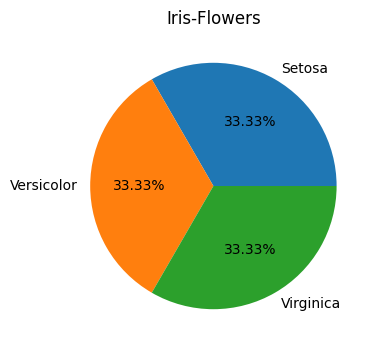

In [9]:
plt.figure(figsize=[4,4])

# Create a list of labels for the pie chart
types = ['Setosa', 'Versicolor', 'Virginica']

# Create a list of sizes for the pie chart
quantity = [setosa, versicolor, virginica]

# Create a pie chart
plt.pie(quantity, labels=types, autopct='%1.2f%%')

# Set the title of the pie chart
plt.title("Iris-Flowers")

plt.show()

### Bar Plot between sepal length and species

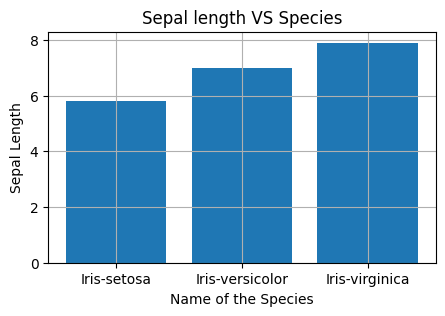

In [10]:
plt.figure(figsize=[5, 3])
plt.bar(data['Species'],data['SepalLengthCm'])
plt.title("Sepal length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Length")
plt.grid(True)
plt.show()

### Bar plot between sepal width and species

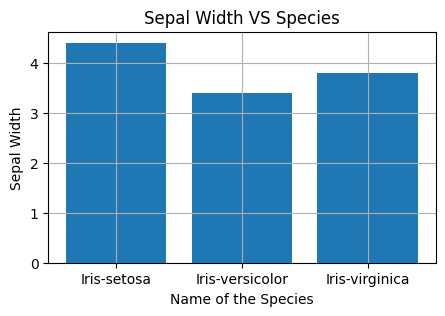

In [11]:
plt.figure(figsize=[5, 3])
plt.bar(data['Species'],data['SepalWidthCm'])
plt.title("Sepal Width VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()

### Bar plot between petal length and species

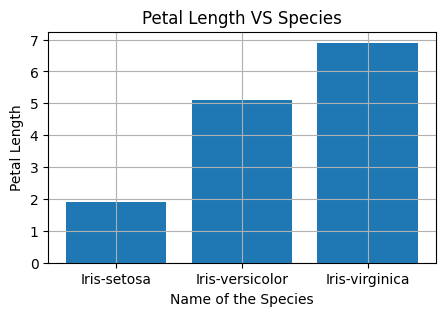

In [12]:
plt.figure(figsize=[5, 3])
plt.bar(data['Species'],data['PetalLengthCm'])
plt.title("Petal Length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()

### Bar plot between petal width and species

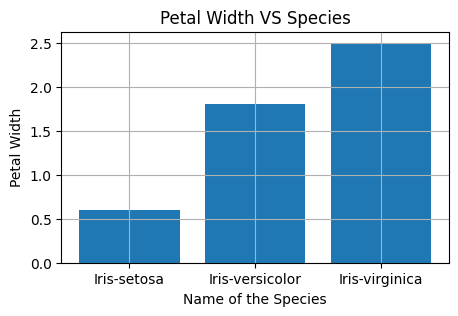

In [13]:
plt.figure(figsize=[5, 3])
plt.bar(data['Species'],data['PetalWidthCm'])
plt.title("Petal Width VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()

### Checking for outliers

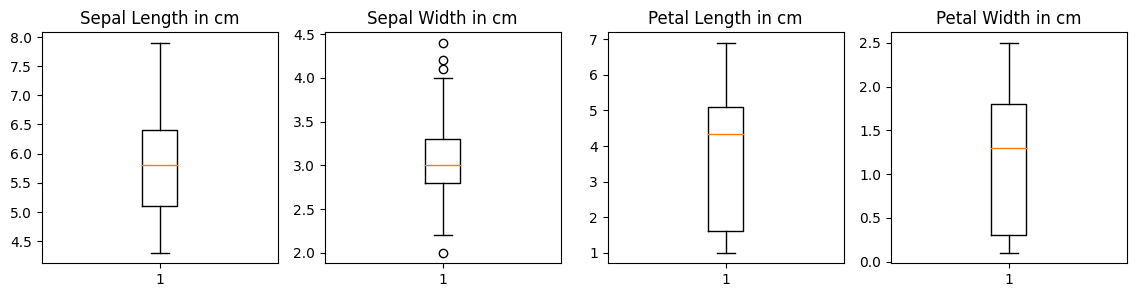

In [14]:
# Create subplots
fig, (s1, s2, s3, s4) = plt.subplots(1, 4, figsize=(14, 3))

# Plot the data on the subplots
s1.boxplot([data['SepalLengthCm']])
s1.set_title("Sepal Length in cm")

s2.boxplot([data['SepalWidthCm']])
s2.set_title("Sepal Width in cm")

s3.boxplot([data['PetalLengthCm']])
s3.set_title("Petal Length in cm")

s4.boxplot([data['PetalWidthCm']])
s4.set_title("Petal Width in cm")

# Show the figure
plt.show()

## Training & Testing

In [15]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# Make the data X and Y
X = data.drop('Species',axis=1)
Y = data['Species']

In [17]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [19]:
print("Type of X:", type(X))
print("Type of Y:", type(Y))

Type of X: <class 'pandas.core.frame.DataFrame'>
Type of Y: <class 'pandas.core.series.Series'>


### Split the data into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [21]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


### K-Nearest Neighbors: KNN

The KNN algorithm works based on the principle that objects (data points) belonging to the same class tend to be close to each other in the feature space. In other words, similar objects are likely to have similar labels.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Train the classifier
knn.fit(X_train.values, Y_train.values)

# Accuracy on testing dataset
print("Accuracy of Decision Tree Classifier:", "{:.3f}".format(knn.score(X_test, Y_test)))

Accuracy of Decision Tree Classifier: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### Decision Tree Classifier

It represents the data in the form of a tree structure, where each internal node corresponds to a feature, each branch represents a decision rule, and each leaf node represents a class label.

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the K-Nearest Neighbors classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train,Y_train)

# Accuracy on testing dataset
print("Accuracy of Decision Tree Classifier:", "{:.3f}".format(classifier.score(X_test, Y_test)))

Accuracy of Decision Tree Classifier: 1.000


## Save Model

In [24]:
import pickle

In [25]:
# Save the trained model(i have saved knn classifier)
file = "model.pkl"
with open(file, 'wb') as file:
    pickle.dump(knn, file)

## Load Model and Test

In [26]:
# Load the model from the file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Use the loaded model for predictions
predictions = model.predict([[4,1.9,1,0.4]])
predictions

array(['Iris-setosa'], dtype=object)

In [27]:
predictions = model.predict([[8.9,3.6,2.9,2.4]])
predictions

array(['Iris-versicolor'], dtype=object)

In [28]:
predictions = model.predict([[8.9,7.6,5.9,2.4]])
predictions

array(['Iris-virginica'], dtype=object)